In [3]:
from pandas import read_csv, get_dummies, ExcelWriter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = read_csv('./data/vietnam_housing_dataset.csv')
df.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
16,"Dự án Khu đô thị Phương Đông, Xã Đông Xá, Vân ...",300.0,15.0,32.0,Đông,Nam,3.0,6.0,3.0,Have certificate,Full,9.40
19,"Đường Quang Trung, Phường 12, Gò Vấp, Hồ Chí Minh",46.0,4.6,6.0,Đông - Nam,Đông - Nam,4.0,4.0,5.0,Have certificate,Full,7.99
23,"Đường Ngô Tất Tố, Phường 22, Bình Thạnh, Hồ Ch...",60.0,3.5,5.0,Đông - Nam,Đông,2.0,6.0,5.0,Have certificate,Full,5.60
24,"Dự án Vườn Vua Resort & Villas, Đường 316, Xã ...",369.0,15.0,12.0,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.30
32,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",78.0,6.0,13.0,Đông - Nam,Đông - Nam,4.0,6.0,6.0,Have certificate,Basic,8.63


In [105]:
df[['Frontage', 'Price']].corr()

,Frontage,Price
Frontage,1.000000,0.069071
Price,0.069071,1.000000


In [6]:
def split_text(text):
    text = text.split(',')[-1].strip()
    if '.' in text:
        return text[:-1]
    return text

In [7]:
df['Province'] = df['Address'].map(split_text)

In [8]:
df['Province'].unique()

array(['Quảng Ninh', 'Hồ Chí Minh', 'Phú Thọ', 'Hưng Yên', 'Hà Nội',
       'Long An', 'Bắc Ninh', 'Đà Nẵng', 'Đồng Nai', 'Khánh Hòa',
       'Hà Nam', 'Nghệ An', 'Hải Phòng', 'Lâm Đồng', 'Bà Rịa Vũng Tàu',
       'Hòa Bình', 'Thanh Hóa', 'Bình Định', 'Kiên Giang', 'Bình Thuận',
       'Bình Dương', 'Hải Dương', 'Tiền Giang', 'Đắk Lắk', 'Cần Thơ',
       'Thừa Thiên Huế', 'Điện Biên', 'Thái Bình', 'Quảng Nam',
       'Quảng Trị', 'Bình Phước', 'Bến Tre', 'Bắc Giang', 'Vĩnh Phúc',
       'An Giang', 'Lào Cai', 'Thái Nguyên', 'Gia Lai', 'Quảng Ngãi',
       'Bạc Liêu', 'Hà Tĩnh', 'Phú Yên', 'Vĩnh Long', 'Đồng Tháp',
       'Nam Định', 'Tây Ninh'], dtype=object)

In [19]:
df.columns

Index(['Address', 'Area', 'Frontage', 'Access Road', 'House direction',
       'Balcony direction', 'Floors', 'Bedrooms', 'Bathrooms', 'Legal status',
       'Furniture state', 'Price', 'Province'],
      dtype='object')

In [9]:
df_train, df_text = train_test_split(df)

In [13]:
df.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,Province
16,"Dự án Khu đô thị Phương Đông, Xã Đông Xá, Vân ...",300.0,15.0,32.0,Đông,Nam,3.0,6.0,3.0,Have certificate,Full,9.40,Quảng Ninh
19,"Đường Quang Trung, Phường 12, Gò Vấp, Hồ Chí Minh",46.0,4.6,6.0,Đông - Nam,Đông - Nam,4.0,4.0,5.0,Have certificate,Full,7.99,Hồ Chí Minh
23,"Đường Ngô Tất Tố, Phường 22, Bình Thạnh, Hồ Ch...",60.0,3.5,5.0,Đông - Nam,Đông,2.0,6.0,5.0,Have certificate,Full,5.60,Hồ Chí Minh
24,"Dự án Vườn Vua Resort & Villas, Đường 316, Xã ...",369.0,15.0,12.0,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.30,Phú Thọ
32,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",78.0,6.0,13.0,Đông - Nam,Đông - Nam,4.0,6.0,6.0,Have certificate,Basic,8.63,Hưng Yên


In [12]:
df.columns

Index(['Address', 'Area', 'Frontage', 'Access Road', 'House direction',
       'Balcony direction', 'Floors', 'Bedrooms', 'Bathrooms', 'Legal status',
       'Furniture state', 'Price', 'Province'],
      dtype='object')

In [14]:
cols = ['Address', 'Province',  'House direction',
       'Balcony direction', 'Legal status',
       'Furniture state', 'Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms',  'Price']

In [15]:
with ExcelWriter('housing_data_preprocessor.xlsx') as writer:
    df_train[cols].to_excel(writer, sheet_name='train_data', index=None)
    df_text[cols].to_excel(writer, sheet_name='test_data', index=None)
    df[cols].to_excel(writer, sheet_name='data', index=None)

In [102]:
df.to_excel("housing_data_preprocessor.xlsx",index=None)

In [22]:
df['Furniture state'] = df['Furniture state'].map({'Basic': 0, 'Full': 1 })

In [23]:
df['Legal status'].unique()

array(['Have certificate', 'Sale contract'], dtype=object)

In [24]:
df['Legal status'] = df['Legal status'].map({'Have certificate': 0, 'Sale contract': 1})

In [25]:
df.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,Province
16,"Dự án Khu đô thị Phương Đông, Xã Đông Xá, Vân ...",300.0,15.0,32.0,Đông,Nam,3.0,6.0,3.0,0,1,9.40,Quảng Ninh
19,"Đường Quang Trung, Phường 12, Gò Vấp, Hồ Chí Minh",46.0,4.6,6.0,Đông - Nam,Đông - Nam,4.0,4.0,5.0,0,1,7.99,Hồ Chí Minh
23,"Đường Ngô Tất Tố, Phường 22, Bình Thạnh, Hồ Ch...",60.0,3.5,5.0,Đông - Nam,Đông,2.0,6.0,5.0,0,1,5.60,Hồ Chí Minh
24,"Dự án Vườn Vua Resort & Villas, Đường 316, Xã ...",369.0,15.0,12.0,Đông - Nam,Đông - Nam,2.0,4.0,4.0,0,1,6.30,Phú Thọ
32,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",78.0,6.0,13.0,Đông - Nam,Đông - Nam,4.0,6.0,6.0,0,0,8.63,Hưng Yên


In [27]:
df.columns

Index(['Address', 'Area', 'Frontage', 'Access Road', 'House direction',
       'Balcony direction', 'Floors', 'Bedrooms', 'Bathrooms', 'Legal status',
       'Furniture state', 'Price', 'Province'],
      dtype='object')

In [31]:
df2 = get_dummies(df, columns= ['House direction', 'Balcony direction', 'Province'], drop_first=True, dtype=int)
df2.shape

(2645, 69)

In [32]:
df['Province'].unique()

array(['Quảng Ninh', 'Hồ Chí Minh', 'Phú Thọ', 'Hưng Yên', 'Hà Nội',
       'Long An', 'Bắc Ninh', 'Đà Nẵng', 'Đồng Nai', 'Khánh Hòa',
       'Hà Nam', 'Nghệ An', 'Hải Phòng', 'Lâm Đồng', 'Bà Rịa Vũng Tàu',
       'Hòa Bình', 'Thanh Hóa', 'Bình Định', 'Kiên Giang', 'Bình Thuận',
       'Bình Dương', 'Hải Dương', 'Tiền Giang', 'Đắk Lắk', 'Cần Thơ',
       'Thừa Thiên Huế', 'Điện Biên', 'Thái Bình', 'Quảng Nam',
       'Quảng Trị', 'Bình Phước', 'Bến Tre', 'Bắc Giang', 'Vĩnh Phúc',
       'An Giang', 'Lào Cai', 'Thái Nguyên', 'Gia Lai', 'Quảng Ngãi',
       'Bạc Liêu', 'Hà Tĩnh', 'Phú Yên', 'Vĩnh Long', 'Đồng Tháp',
       'Nam Định', 'Tây Ninh'], dtype=object)

In [34]:
df2.to_excel('housing_data.xlsx', index=False)

In [33]:
df2.head()

,Address,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,House direction_Nam,House direction_Tây,House direction_Tây - Bắc,House direction_Tây - Nam,House direction_Đông,House direction_Đông - Bắc,House direction_Đông - Nam,Balcony direction_Nam,Balcony direction_Tây,Balcony direction_Tây - Bắc,Balcony direction_Tây - Nam,Balcony direction_Đông,Balcony direction_Đông - Bắc,Balcony direction_Đông - Nam,Province_Bà Rịa Vũng Tàu,Province_Bình Dương,Province_Bình Phước,Province_Bình Thuận,Province_Bình Định,Province_Bạc Liêu,Province_Bắc Giang,Province_Bắc Ninh,Province_Bến Tre,Province_Cần Thơ,Province_Gia Lai,Province_Hà Nam,Province_Hà Nội,Province_Hà Tĩnh,Province_Hòa Bình,Province_Hưng Yên,Province_Hải Dương,Province_Hải Phòng,Province_Hồ Chí Minh,Province_Khánh Hòa,Province_Kiên Giang,Province_Long An,Province_Lào Cai,Province_Lâm Đồng,Province_Nam Định,Province_Nghệ An,Province_Phú Thọ,Province_Phú Yên,Province_Quảng Nam,Province_Quảng Ngãi,Province_Quảng Ninh,Province_Quảng Trị,Province_Thanh Hóa,Province_Thái Bình,Province_Thái Nguyên,Province_Thừa Thiên Huế,Province_Tiền Giang,Province_Tây Ninh,Province_Vĩnh Long,Province_Vĩnh Phúc,Province_Điện Biên,Province_Đà Nẵng,Province_Đắk Lắk,Province_Đồng Nai,Province_Đồng Tháp
16,"Dự án Khu đô thị Phương Đông, Xã Đông Xá, Vân ...",300.0,15.0,32.0,3.0,6.0,3.0,0,1,9.40,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,"Đường Quang Trung, Phường 12, Gò Vấp, Hồ Chí Minh",46.0,4.6,6.0,4.0,4.0,5.0,0,1,7.99,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,"Đường Ngô Tất Tố, Phường 22, Bình Thạnh, Hồ Ch...",60.0,3.5,5.0,2.0,6.0,5.0,0,1,5.60,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,"Dự án Vườn Vua Resort & Villas, Đường 316, Xã ...",369.0,15.0,12.0,2.0,4.0,4.0,0,1,6.30,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",78.0,6.0,13.0,4.0,6.0,6.0,0,0,8.63,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
df2.drop(columns='Address', inplace=True)

In [37]:
df2.head()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,House direction_Nam,House direction_Tây,House direction_Tây - Bắc,House direction_Tây - Nam,House direction_Đông,House direction_Đông - Bắc,House direction_Đông - Nam,Balcony direction_Nam,Balcony direction_Tây,Balcony direction_Tây - Bắc,Balcony direction_Tây - Nam,Balcony direction_Đông,Balcony direction_Đông - Bắc,Balcony direction_Đông - Nam,Province_Bà Rịa Vũng Tàu,Province_Bình Dương,Province_Bình Phước,Province_Bình Thuận,Province_Bình Định,Province_Bạc Liêu,Province_Bắc Giang,Province_Bắc Ninh,Province_Bến Tre,Province_Cần Thơ,Province_Gia Lai,Province_Hà Nam,Province_Hà Nội,Province_Hà Tĩnh,Province_Hòa Bình,Province_Hưng Yên,Province_Hải Dương,Province_Hải Phòng,Province_Hồ Chí Minh,Province_Khánh Hòa,Province_Kiên Giang,Province_Long An,Province_Lào Cai,Province_Lâm Đồng,Province_Nam Định,Province_Nghệ An,Province_Phú Thọ,Province_Phú Yên,Province_Quảng Nam,Province_Quảng Ngãi,Province_Quảng Ninh,Province_Quảng Trị,Province_Thanh Hóa,Province_Thái Bình,Province_Thái Nguyên,Province_Thừa Thiên Huế,Province_Tiền Giang,Province_Tây Ninh,Province_Vĩnh Long,Province_Vĩnh Phúc,Province_Điện Biên,Province_Đà Nẵng,Province_Đắk Lắk,Province_Đồng Nai,Province_Đồng Tháp
16,300.0,15.0,32.0,3.0,6.0,3.0,0,1,9.40,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,46.0,4.6,6.0,4.0,4.0,5.0,0,1,7.99,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,60.0,3.5,5.0,2.0,6.0,5.0,0,1,5.60,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,369.0,15.0,12.0,2.0,4.0,4.0,0,1,6.30,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,78.0,6.0,13.0,4.0,6.0,6.0,0,0,8.63,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
df2.columns

Index(['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms',
       'Legal status', 'Furniture state', 'Price', 'House direction_Nam',
       'House direction_Tây', 'House direction_Tây - Bắc',
       'House direction_Tây - Nam', 'House direction_Đông',
       'House direction_Đông - Bắc', 'House direction_Đông - Nam',
       'Balcony direction_Nam', 'Balcony direction_Tây',
       'Balcony direction_Tây - Bắc', 'Balcony direction_Tây - Nam',
       'Balcony direction_Đông', 'Balcony direction_Đông - Bắc',
       'Balcony direction_Đông - Nam', 'Province_Bà Rịa Vũng Tàu',
       'Province_Bình Dương', 'Province_Bình Phước', 'Province_Bình Thuận',
       'Province_Bình Định', 'Province_Bạc Liêu', 'Province_Bắc Giang',
       'Province_Bắc Ninh', 'Province_Bến Tre', 'Province_Cần Thơ',
       'Province_Gia Lai', 'Province_Hà Nam', 'Province_Hà Nội',
       'Province_Hà Tĩnh', 'Province_Hòa Bình', 'Province_Hưng Yên',
       'Province_Hải Dương', 'Province_Hải Phòng', 'Pro

In [47]:
scaler = StandardScaler()
cols = ['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms']
df2[cols] = scaler.fit_transform(df2[cols])


In [49]:
df2.head()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,House direction_Nam,House direction_Tây,House direction_Tây - Bắc,House direction_Tây - Nam,House direction_Đông,House direction_Đông - Bắc,House direction_Đông - Nam,Balcony direction_Nam,Balcony direction_Tây,Balcony direction_Tây - Bắc,Balcony direction_Tây - Nam,Balcony direction_Đông,Balcony direction_Đông - Bắc,Balcony direction_Đông - Nam,Province_Bà Rịa Vũng Tàu,Province_Bình Dương,Province_Bình Phước,Province_Bình Thuận,Province_Bình Định,Province_Bạc Liêu,Province_Bắc Giang,Province_Bắc Ninh,Province_Bến Tre,Province_Cần Thơ,Province_Gia Lai,Province_Hà Nam,Province_Hà Nội,Province_Hà Tĩnh,Province_Hòa Bình,Province_Hưng Yên,Province_Hải Dương,Province_Hải Phòng,Province_Hồ Chí Minh,Province_Khánh Hòa,Province_Kiên Giang,Province_Long An,Province_Lào Cai,Province_Lâm Đồng,Province_Nam Định,Province_Nghệ An,Province_Phú Thọ,Province_Phú Yên,Province_Quảng Nam,Province_Quảng Ngãi,Province_Quảng Ninh,Province_Quảng Trị,Province_Thanh Hóa,Province_Thái Bình,Province_Thái Nguyên,Province_Thừa Thiên Huế,Province_Tiền Giang,Province_Tây Ninh,Province_Vĩnh Long,Province_Vĩnh Phúc,Province_Điện Biên,Province_Đà Nẵng,Province_Đắk Lắk,Province_Đồng Nai,Province_Đồng Tháp
16,4.553681,1.936092,3.222666,-0.163930,2.137037,-0.264757,0,1,9.40,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,-0.491024,-0.179133,-0.212046,0.618731,0.445443,1.226794,0,1,7.99,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,-0.212970,-0.402859,-0.344150,-0.946590,2.137037,1.226794,0,1,5.60,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,5.924093,1.936092,0.580580,-0.946590,0.445443,0.481018,0,1,6.30,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,0.144529,0.105609,0.712684,0.618731,2.137037,1.972569,0,0,8.63,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
X = df2.drop(columns='Price').values
y = df2['Price'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression()

In [54]:
lg.score(X_train, y_train), lg.score(X_test, y_test)

(0.454688349197536, 0.380582340005733)

In [56]:
lg.coef_, lg.intercept_

(array([ 7.54924924e-01, -2.54587452e-02,  4.66452589e-01,  6.17193948e-01,
         1.93237848e-01,  4.21547895e-01,  4.89688135e-02,  2.78083369e-01,
        -4.98106243e-01, -4.09861014e-02, -2.22183636e-01, -4.51635844e-01,
        -6.24398093e-02, -2.49630364e-01, -3.01147238e-01,  3.66805609e-01,
        -2.03034324e-01,  1.15247366e-01,  1.87343470e-01, -2.81851788e-01,
         2.64305635e-02,  1.83387980e-01, -2.17683107e+00, -2.70114519e+00,
        -5.33284115e+00, -1.76021916e+00, -3.12604956e+00, -4.63367074e+00,
        -4.48403137e+00, -1.71771965e+00, -4.18148611e+00, -1.95431802e+00,
        -3.10862447e-14, -2.23871164e+00, -1.44677707e+00, -7.99360578e-15,
        -5.84081554e+00, -8.55917992e-01, -2.48323161e+00, -2.86343617e+00,
        -4.10256537e-01, -1.80419730e+00, -2.36001879e+00, -3.54908908e+00,
        -2.94333646e+00, -3.13722811e+00,  3.10862447e-15,  6.62369372e-01,
        -4.27216370e+00, -1.86756170e+00, -1.63566589e+00,  7.06252365e-01,
        -2.2

In [58]:
lg.fit(X, y)

LinearRegression()

In [59]:
y_pred = lg.predict(X)

In [68]:
import math
import numpy as np

In [75]:
X.shape[1]

67

In [74]:
se = math.sqrt(((y - y_pred) ** 2).sum() / (len(y) - X.shape[1] + 1))
se

1.6910307689493165

In [82]:
df3 = df2.iloc[np.abs(y - y_pred) < 3 * se]


In [83]:
df3.head()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,House direction_Nam,House direction_Tây,House direction_Tây - Bắc,House direction_Tây - Nam,House direction_Đông,House direction_Đông - Bắc,House direction_Đông - Nam,Balcony direction_Nam,Balcony direction_Tây,Balcony direction_Tây - Bắc,Balcony direction_Tây - Nam,Balcony direction_Đông,Balcony direction_Đông - Bắc,Balcony direction_Đông - Nam,Province_Bà Rịa Vũng Tàu,Province_Bình Dương,Province_Bình Phước,Province_Bình Thuận,Province_Bình Định,Province_Bạc Liêu,Province_Bắc Giang,Province_Bắc Ninh,Province_Bến Tre,Province_Cần Thơ,Province_Gia Lai,Province_Hà Nam,Province_Hà Nội,Province_Hà Tĩnh,Province_Hòa Bình,Province_Hưng Yên,Province_Hải Dương,Province_Hải Phòng,Province_Hồ Chí Minh,Province_Khánh Hòa,Province_Kiên Giang,Province_Long An,Province_Lào Cai,Province_Lâm Đồng,Province_Nam Định,Province_Nghệ An,Province_Phú Thọ,Province_Phú Yên,Province_Quảng Nam,Province_Quảng Ngãi,Province_Quảng Ninh,Province_Quảng Trị,Province_Thanh Hóa,Province_Thái Bình,Province_Thái Nguyên,Province_Thừa Thiên Huế,Province_Tiền Giang,Province_Tây Ninh,Province_Vĩnh Long,Province_Vĩnh Phúc,Province_Điện Biên,Province_Đà Nẵng,Province_Đắk Lắk,Province_Đồng Nai,Province_Đồng Tháp
16,4.553681,1.936092,3.222666,-0.163930,2.137037,-0.264757,0,1,9.40,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,-0.491024,-0.179133,-0.212046,0.618731,0.445443,1.226794,0,1,7.99,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,-0.212970,-0.402859,-0.344150,-0.946590,2.137037,1.226794,0,1,5.60,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,5.924093,1.936092,0.580580,-0.946590,0.445443,0.481018,0,1,6.30,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,0.144529,0.105609,0.712684,0.618731,2.137037,1.972569,0,0,8.63,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
df3.columns

Index(['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms',
       'Legal status', 'Furniture state', 'Price', 'House direction_Nam',
       'House direction_Tây', 'House direction_Tây - Bắc',
       'House direction_Tây - Nam', 'House direction_Đông',
       'House direction_Đông - Bắc', 'House direction_Đông - Nam',
       'Balcony direction_Nam', 'Balcony direction_Tây',
       'Balcony direction_Tây - Bắc', 'Balcony direction_Tây - Nam',
       'Balcony direction_Đông', 'Balcony direction_Đông - Bắc',
       'Balcony direction_Đông - Nam', 'Province_Bà Rịa Vũng Tàu',
       'Province_Bình Dương', 'Province_Bình Phước', 'Province_Bình Thuận',
       'Province_Bình Định', 'Province_Bạc Liêu', 'Province_Bắc Giang',
       'Province_Bắc Ninh', 'Province_Bến Tre', 'Province_Cần Thơ',
       'Province_Gia Lai', 'Province_Hà Nam', 'Province_Hà Nội',
       'Province_Hà Tĩnh', 'Province_Hòa Bình', 'Province_Hưng Yên',
       'Province_Hải Dương', 'Province_Hải Phòng', 'Pro

In [106]:
df3[['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms', 'Price']].corr()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
Area,1.000000,0.299339,0.322460,-0.364254,0.107632,-0.003101,0.191351
Frontage,0.299339,1.000000,0.171734,-0.073084,0.038534,0.020504,0.086035
Access Road,0.322460,0.171734,1.000000,-0.088926,0.127384,0.103491,0.260545
Floors,-0.364254,-0.073084,-0.088926,1.000000,0.488129,0.608080,0.290244
Bedrooms,0.107632,0.038534,0.127384,0.488129,1.000000,0.749199,0.420078
Bathrooms,-0.003101,0.020504,0.103491,0.608080,0.749199,1.000000,0.471033
Price,0.191351,0.086035,0.260545,0.290244,0.420078,0.471033,1.000000


In [95]:
from sklearn.neighbors import KNeighborsRegressor
kneighbors = KNeighborsRegressor()
kneighbors.fit(X_train, y_train)
kneighbors.score(X_train, y_train), kneighbors.score(X_test, y_test)

(0.5973236814195175, 0.3707280762110521)

In [96]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()
randomForest.fit(X_train, y_train)
randomForest.score(X_train, y_train), randomForest.score(X_test, y_test)

(0.935077236077343, 0.5337969044885769)

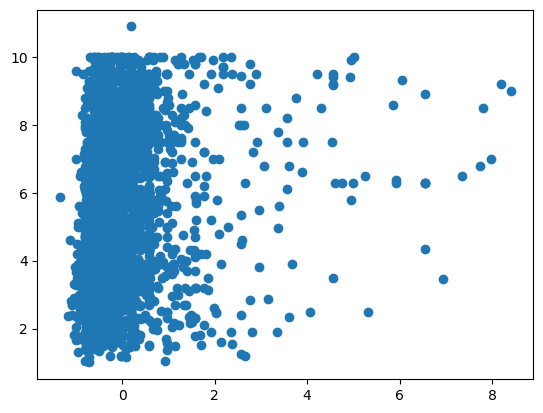

In [91]:
import matplotlib.pyplot as plt

plt.scatter(x = df3['Area'], y = df3['Price'])
plt.show()

In [84]:
X = df3.drop(columns='Price').values
y = df3['Price'].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [86]:
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression()

In [87]:
lg.score(X_train, y_train), lg.score(X_test, y_test)

(0.462968971329381, 0.4391559199480035)

In [45]:
df['Area'].mean(), df['Area'].std()

(np.float64(70.72297920604915), 50.35933759970463)

In [46]:
df['Area']

16       300.0
19        46.0
23        60.0
24       369.0
32        78.0
         ...  
30196     86.4
30201    300.0
30204     32.0
30218     51.6
30220     45.0
Name: Area, Length: 2645, dtype: float64

In [41]:
import pandas as pd

data = pd.DataFrame(data = {
    'x': [1, 3, 5, 9, 7, 99]
})
data

,x
0,1
1,3
2,5
3,9
4,7
5,99


In [42]:
scaler.fit_transform(data[['x']])

array([[-0.55987713],
       [-0.50294048],
       [-0.44600382],
       [-0.3321305 ],
       [-0.38906716],
       [ 2.23001909]])

          x         y
x  1.000000 -0.181172
y -0.181172  1.000000


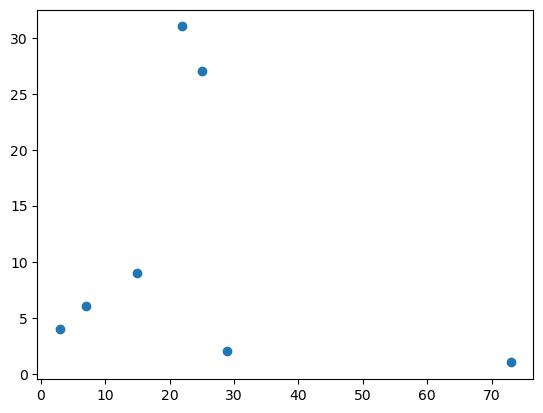

In [94]:
data = pd.DataFrame(data = {
    'x': [3, 7, 15, 25, 22, 29, 73],
    'y': [4, 6, 9, 27, 31, 2, 1]
})
print(data.corr())
plt.scatter(x = data['x'], y = data['y'])
plt.show()